#### Import Statements/Loading in Data/Initial Observations

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import re
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import wordpunct_tokenize

nltk.download("stopwords")

tweets = pd.read_csv(
    "/Users/rohitkandala/Desktop/UChicago/Academic Quarters/2022-23/Spring 2023/CAPP 30254/Final Project/ml-affordable-care-act/ml-affordable-care-act/data/obamacare_19_23.csv"
)

tweets.loc[:, "Text_Split"] = tweets.loc[:, "Text"].apply(lambda x: x.split())

# There are 36,724 tweets in this dataset.
tweets.shape

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rohitkandala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(36724, 4)

#### Most Retweeted Tweets

In [107]:
pd.set_option("display.max_colwidth", None)
text_counts = tweets["Text"].value_counts()

# retweeted tweets
repeated_text = text_counts[text_counts > 1]

for text, count in repeated_text.items():
    print("Count:", count)
    print("Text:", text)
    print("")

Count: 3650
Text: RT @SpeakerPelosi: A must read. Even in the middle of the coronavirus crisis, the President is trying to take away women’s health care &amp; al…

Count: 1539
Text: RT @BarackObama: I’ll always be proud to have my name associated with a program that’s helping folks get the health care they need.  https:…

Count: 760
Text: RT @AmbassadorRice: Women have the most to lose if Trump succeeds in killing The ACA. It will be a return to health care discrimination. Re…

Count: 717
Text: RT @DeanObeidallah: DAILY REMINDER: The Trump REGIME is in federal court trying to end you and your families coverage for pre-existing medi…

Count: 582
Text: RT @ewarren: This is a great piece by @Sebelius.

Donald Trump wants to take us back to the days when insurers could deny women health cove…

Count: 490
Text: RT @nytimes: Breaking News: The bulk of the Affordable Care Act seems likely to survive its latest encounter with the Supreme Court after k…

Count: 437
Text: RT @murray_nyc: @realDo

#### Tweets pertaining to the word 'Obamacare'
* In order to be included, the tweet just must simply contain the string 'obamacare' in the text.

In [209]:
obamacare = tweets[tweets["Text"].str.contains("obamacare", case=False)]
obamacare.shape

(16430, 4)

In [152]:
stop = set(stopwords.words("english"))
stop.update(
    [
        ".",
        ",",
        '"',
        "'",
        "?",
        "!",
        ":",
        ";",
        "(",
        ")",
        "[",
        "]",
        "{",
        "}",
        "@",
        "#",
        "rt",
        "amp",
        "http",
        "https",
        "/",
        "://",
        "_",
        "co",
        "RT",
    ]
)

In [191]:
series_tweets = obamacare["Text"]
series_tweets.shape
tweet_str = series_tweets.str.cat(sep=" ")
list_of_words = [
    i.lower()
    for i in wordpunct_tokenize(tweet_str)
    if i.lower() not in stop and i.isalpha()
]
wordfreqdist = nltk.FreqDist(list_of_words)
mostcommon_ob = wordfreqdist.most_common(30)
print(mostcommon_ob)

[('obamacare', 17210), ('aca', 12607), ('trump', 4387), ('healthcare', 2404), ('health', 2233), ('insurance', 2095), ('realdonaldtrump', 1994), ('gop', 1600), ('plan', 1583), ('care', 1538), ('pre', 1328), ('get', 1252), ('coverage', 1232), ('court', 1225), ('people', 1172), ('medicare', 988), ('end', 975), ('repeal', 915), ('biden', 867), ('medicaid', 867), ('existing', 858), ('republicans', 846), ('millions', 842), ('would', 838), ('americans', 836), ('need', 835), ('could', 796), ('obama', 792), ('trying', 784), ('supreme', 771)]


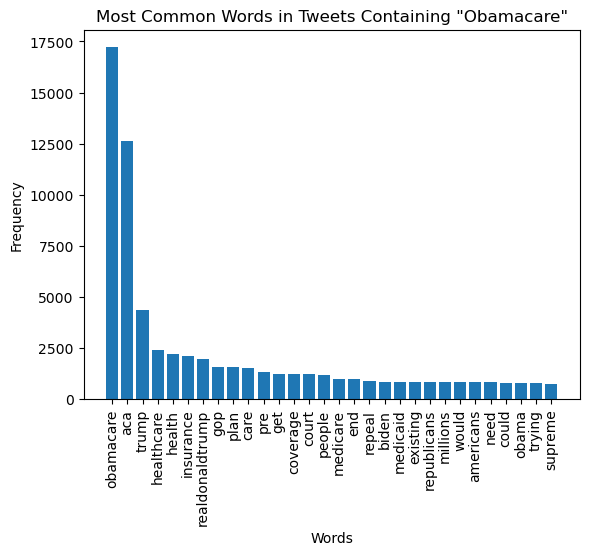

In [192]:
# Create bar plot of the 30 most common words
plt.bar(range(len(mostcommon_ob)), [val[1] for val in mostcommon_ob], align="center")
plt.xticks(range(len(mostcommon_ob)), [val[0] for val in mostcommon_ob], rotation=90)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title('Most Common Words in Tweets Containing "Obamacare"')
plt.show()

In [194]:
list_of_bigrams = list(nltk.bigrams(list_of_words))
bigram_freqdist = nltk.FreqDist(list_of_bigrams)
mostcommon_ob_bi = bigram_freqdist.most_common(30)
print(mostcommon_ob_bi)

[(('obamacare', 'aca'), 11493), (('pre', 'existing'), 834), (('health', 'care'), 813), (('supreme', 'court'), 765), (('end', 'obamacare'), 719), (('get', 'rid'), 670), (('health', 'insurance'), 658), (('repeal', 'obamacare'), 534), (('eliminate', 'obamacare'), 509), (('could', 'lose'), 506), (('lose', 'coverage'), 497), (('existing', 'conditions'), 494), (('trump', 'wins'), 491), (('coverage', 'pre'), 490), (('realdonaldtrump', 'trump'), 485), (('obamacare', 'millions'), 479), (('millions', 'women'), 479), (('women', 'could'), 479), (('case', 'eliminate'), 478), (('wins', 'case'), 477), (('donald', 'trump'), 475), (('pre', 'exi'), 437), (('billion', 'obamacare'), 415), (('exi', 'realdonaldtrump'), 408), (('social', 'security'), 406), (('take', 'away'), 383), (('aca', 'affordablecareact'), 371), (('courts', 'end'), 361), (('care', 'act'), 346), (('affordable', 'care'), 342)]


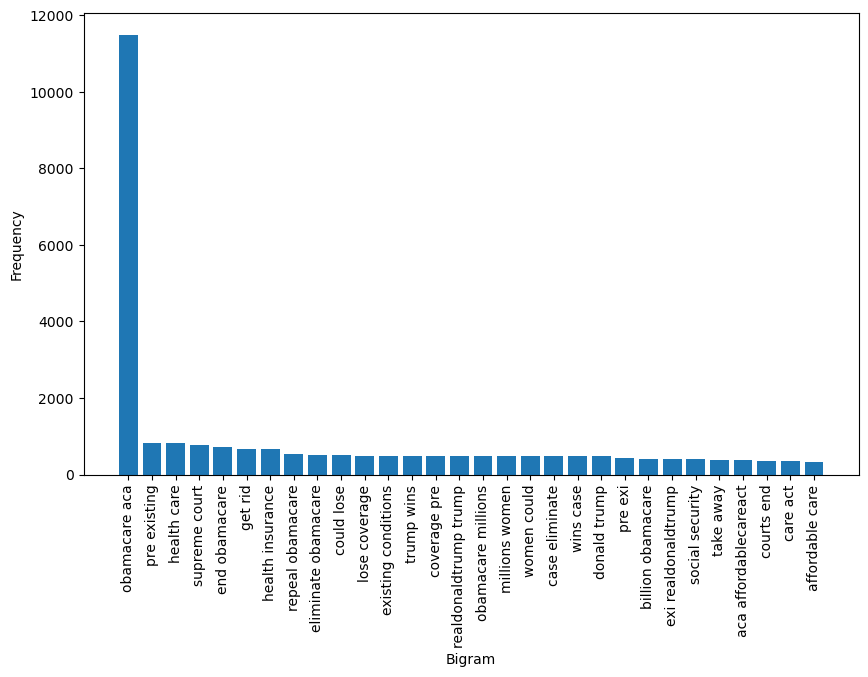

In [195]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Get the top 30 bigrams
top_bigrams = bigram_freqdist.most_common(30)

# Extract the bigram and frequency values
bigrams = [bigram[0][0] + " " + bigram[0][1] for bigram in top_bigrams]
frequencies = [bigram[1] for bigram in top_bigrams]

# Plot the bar chart
ax.bar(bigrams, frequencies)

# Set the x-axis label and rotate the tick labels
ax.set_xlabel("Bigram")
ax.set_ylabel("Frequency")
ax.tick_params(axis="x", rotation=90)

# Show the plot
plt.show()

#### Tweets pertaining to the word(s) 'aca' or 'affordable care act'
* In order to be included, the tweet just must simply contain the string 'aca' or 'affordable care act' in the text.

In [196]:
aca = tweets[
    (
        tweets["Text"].str.contains("aca", case=False)
        | tweets["Text"].str.contains("affordable care act", case=False)
    )
    & ~(tweets["Text"].str.contains("obamacare", case=False))
]
aca.shape

(5582, 4)

In [198]:
series_tweets = aca["Text"]
tweet_str = series_tweets.str.cat(sep=" ")
list_of_words = [
    i.lower()
    for i in wordpunct_tokenize(tweet_str)
    if i.lower() not in stop and i.isalpha()
]
wordfreqdist = nltk.FreqDist(list_of_words)
mostcommon_aca = wordfreqdist.most_common(30)
print(mostcommon_aca)

[('care', 4141), ('affordable', 3255), ('act', 3093), ('aca', 2516), ('court', 1476), ('supreme', 1402), ('health', 1362), ('trump', 1239), ('nytimes', 920), ('women', 906), ('lose', 794), ('return', 763), ('killing', 763), ('succeeds', 762), ('discrimination', 762), ('ambassadorrice', 760), ('help', 616), ('survive', 599), ('bulk', 584), ('likely', 582), ('breaking', 575), ('news', 567), ('latest', 523), ('seems', 522), ('encounter', 511), ('barackobama', 501), ('continues', 499), ('k', 490), ('medicaid', 472), ('especially', 467)]


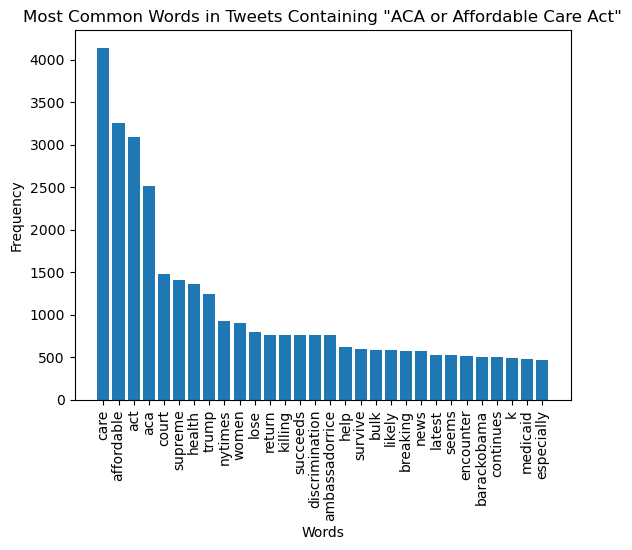

In [199]:
# Create bar plot of the 30 most common words
plt.bar(range(len(mostcommon_aca)), [val[1] for val in mostcommon_aca], align="center")
plt.xticks(range(len(mostcommon_aca)), [val[0] for val in mostcommon_aca], rotation=90)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title('Most Common Words in Tweets Containing "ACA or Affordable Care Act"')
plt.show()

In [200]:
list_of_bigrams = list(nltk.bigrams(list_of_words))
bigram_freqdist = nltk.FreqDist(list_of_bigrams)
mostcommon_aca_bi = bigram_freqdist.most_common(30)
print(mostcommon_aca_bi)

[(('affordable', 'care'), 3088), (('care', 'act'), 3086), (('supreme', 'court'), 1401), (('health', 'care'), 1011), (('women', 'lose'), 761), (('lose', 'trump'), 761), (('trump', 'succeeds'), 761), (('succeeds', 'killing'), 761), (('killing', 'aca'), 761), (('aca', 'return'), 761), (('return', 'health'), 761), (('care', 'discrimination'), 761), (('ambassadorrice', 'women'), 760), (('bulk', 'affordable'), 583), (('likely', 'survive'), 576), (('discrimination', 'ambassadorrice'), 563), (('survive', 'latest'), 510), (('latest', 'encounter'), 510), (('encounter', 'supreme'), 510), (('seems', 'likely'), 504), (('act', 'seems'), 503), (('breaking', 'news'), 500), (('news', 'bulk'), 500), (('nytimes', 'breaking'), 491), (('court', 'k'), 490), (('expand', 'medicaid'), 446), (('act', 'continues'), 445), (('states', 'expand'), 436), (('seen', 'affordable'), 434), (('continues', 'help'), 434)]


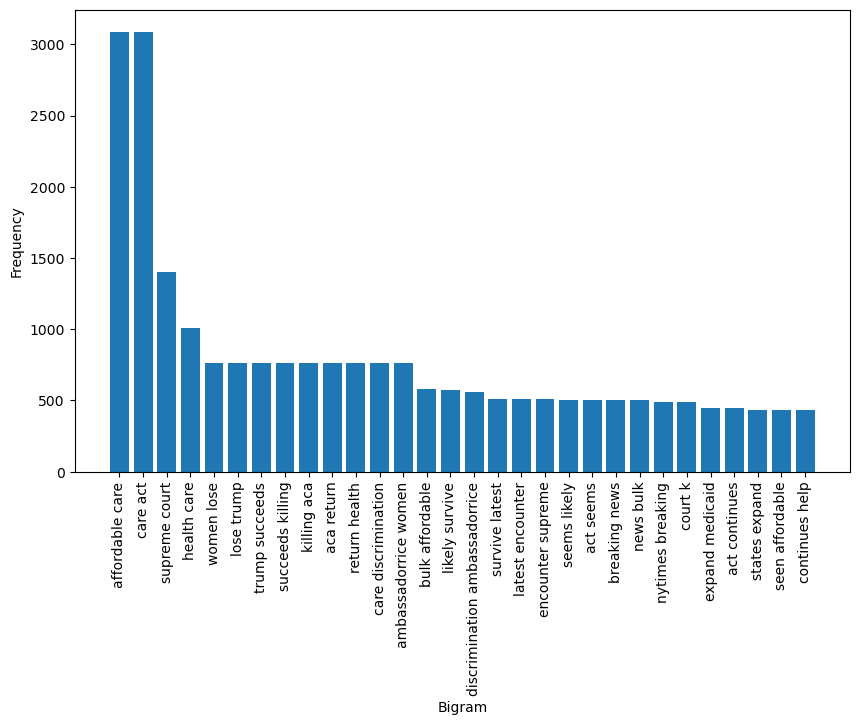

In [201]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Get the top 30 bigrams
top_bigrams = bigram_freqdist.most_common(30)

# Extract the bigram and frequency values
bigrams = [
    bigram[0][0] + " " + bigram[0][1]
    for bigram in top_bigrams
    if bigram[0][0] and bigram[0][1]
]
frequencies = [bigram[1] for bigram in top_bigrams if bigram[0][0] and bigram[0][1]]

# Plot the bar chart
ax.bar(bigrams, frequencies)

# Set the x-axis label and rotate the tick labels
ax.set_xlabel("Bigram")
ax.set_ylabel("Frequency")
ax.tick_params(axis="x", rotation=90)

# Show the plot
plt.show()

#### Tweets pertaining to the word(s) ('aca' or 'affordable care act') AND 'obamacare'
* In order to be included, the tweet just must simply contain the string 'aca' or 'affordable care act', AND 'obamacare' in the text.

In [202]:
both_aca_obamacare = tweets[
    (
        tweets["Text"].str.contains("aca", case=False)
        | tweets["Text"].str.contains("affordable care act", case=False)
    )
    & tweets["Text"].str.contains("obamacare", case=False)
]
both_aca_obamacare.shape

(16430, 4)

In [203]:
series_tweets = both_aca_obamacare["Text"]
tweet_str = series_tweets.str.cat(sep=" ")
list_of_words = [
    i.lower()
    for i in wordpunct_tokenize(tweet_str)
    if i.lower() not in stop and i.isalpha()
]
wordfreqdist = nltk.FreqDist(list_of_words)
mostcommon_all = wordfreqdist.most_common(30)
print(mostcommon_all)

[('obamacare', 17210), ('aca', 12607), ('trump', 4387), ('healthcare', 2404), ('health', 2233), ('insurance', 2095), ('realdonaldtrump', 1994), ('gop', 1600), ('plan', 1583), ('care', 1538), ('pre', 1328), ('get', 1252), ('coverage', 1232), ('court', 1225), ('people', 1172), ('medicare', 988), ('end', 975), ('repeal', 915), ('biden', 867), ('medicaid', 867), ('existing', 858), ('republicans', 846), ('millions', 842), ('would', 838), ('americans', 836), ('need', 835), ('could', 796), ('obama', 792), ('trying', 784), ('supreme', 771)]


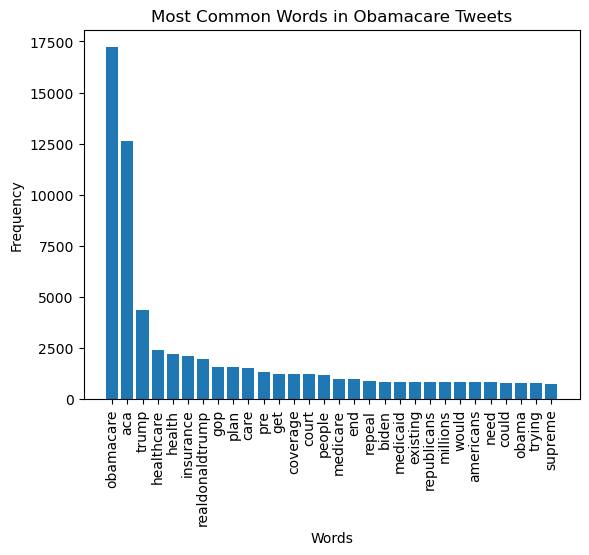

In [204]:
# Create bar plot of the 30 most common words
plt.bar(range(len(mostcommon_all)), [val[1] for val in mostcommon_all], align="center")
plt.xticks(range(len(mostcommon_all)), [val[0] for val in mostcommon_all], rotation=90)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common Words in Obamacare Tweets")
plt.show()

In [205]:
list_of_bigrams = list(nltk.bigrams(list_of_words))
bigram_freqdist = nltk.FreqDist(list_of_bigrams)
mostcommon_all_bi = bigram_freqdist.most_common(30)
print(mostcommon_all_bi)

[(('obamacare', 'aca'), 11493), (('pre', 'existing'), 834), (('health', 'care'), 813), (('supreme', 'court'), 765), (('end', 'obamacare'), 719), (('get', 'rid'), 670), (('health', 'insurance'), 658), (('repeal', 'obamacare'), 534), (('eliminate', 'obamacare'), 509), (('could', 'lose'), 506), (('lose', 'coverage'), 497), (('existing', 'conditions'), 494), (('trump', 'wins'), 491), (('coverage', 'pre'), 490), (('realdonaldtrump', 'trump'), 485), (('obamacare', 'millions'), 479), (('millions', 'women'), 479), (('women', 'could'), 479), (('case', 'eliminate'), 478), (('wins', 'case'), 477), (('donald', 'trump'), 475), (('pre', 'exi'), 437), (('billion', 'obamacare'), 415), (('exi', 'realdonaldtrump'), 408), (('social', 'security'), 406), (('take', 'away'), 383), (('aca', 'affordablecareact'), 371), (('courts', 'end'), 361), (('care', 'act'), 346), (('affordable', 'care'), 342)]


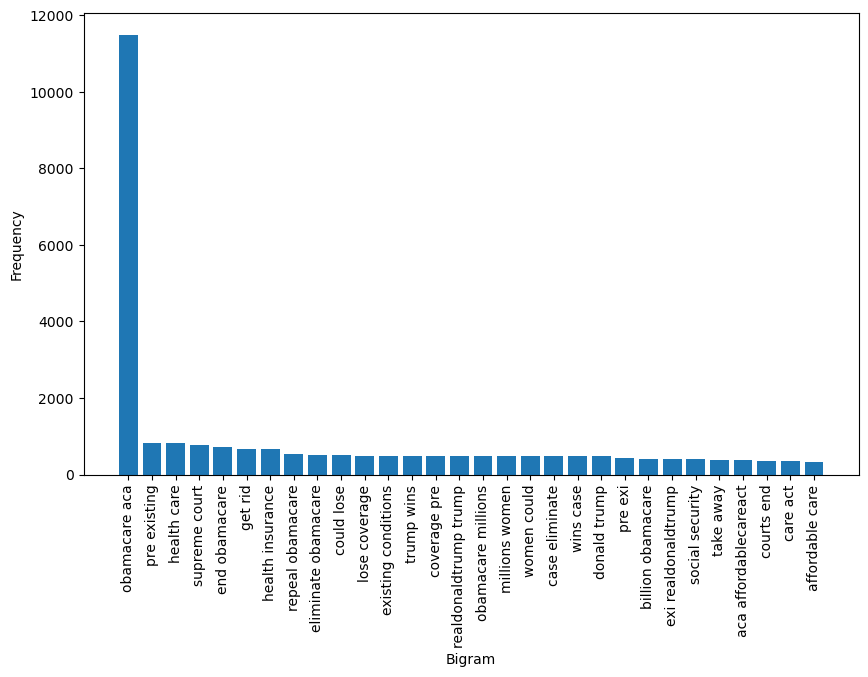

In [206]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Get the top 30 bigrams
top_bigrams = bigram_freqdist.most_common(30)

# Extract the bigram and frequency values
bigrams = [
    bigram[0][0] + " " + bigram[0][1]
    for bigram in top_bigrams
    if bigram[0][0] and bigram[0][1]
]
frequencies = [bigram[1] for bigram in top_bigrams if bigram[0][0] and bigram[0][1]]

# Plot the bar chart
ax.bar(bigrams, frequencies)

# Set the x-axis label and rotate the tick labels
ax.set_xlabel("Bigram")
ax.set_ylabel("Frequency")
ax.tick_params(axis="x", rotation=90)

# Show the plot
plt.show()